In [69]:
import cv2
import matplotlib.pyplot as plt
import glob

%matplotlib inline

### Testen, ob die Verzeichnisse korrekt befüllt sind

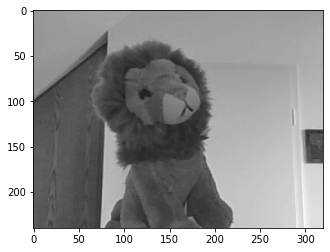

In [70]:
# Zum testen kann man sich die erste Datei anschauen
filenames = []

path = "Data/Images/Capture2/Train/LION"
#path = "Data/Images/Capture2/Train/DUCK"

for name in glob.glob(path +"/*"):
    filenames.append(name)

check_file= cv2.imread(filenames[0])
plt.imshow(check_file, cmap="gray")

## Data Augmentation

In [71]:
from keras.preprocessing.image import ImageDataGenerator

In [90]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              brightness_range=(0.1,0.8),
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")

# Training

### Vorbereitung

In [36]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [74]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same",input_shape=(240,320,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=64, kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=64, kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))


#ggf. noch mehr Conv2D Schichten einfügen 

model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation="sigmoid")) # 0 oder 1 zurück bekommen

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 240, 320, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 60, 80, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 80, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 40, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 76800)            

In [76]:
batch_size = 16

In [80]:
train_image_gen = image_gen.flow_from_directory("DATA/Images/Capture2/Train/",
                                               target_size=(240,320),
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode="binary")

Found 4484 images belonging to 2 classes.


In [81]:
test_image_gen = image_gen.flow_from_directory("DATA/Images/Capture2/Test/",
                                               target_size=(240,320),
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode="binary")

Found 1160 images belonging to 2 classes.


In [82]:
train_image_gen.class_indices

{'DUCK': 0, 'LION': 1}

# Training und Evaluation

In [83]:
results = model.fit(train_image_gen, epochs=2, validation_data=test_image_gen)

Epoch 1/2
281/281 [==============================] - 583s 2s/step - loss: 0.5710 - accuracy: 0.6590 - val_loss: 0.2733 - val_accuracy: 0.8853
Epoch 2/2
281/281 [==============================] - 513s 2s/step - loss: 0.1636 - accuracy: 0.9349 - val_loss: 0.0564 - val_accuracy: 0.9810


In [84]:
#model.save("MartinDoerthe.h5")
model.save("LionDuck.h5")

[0.7948260307312012, 0.9551739692687988]


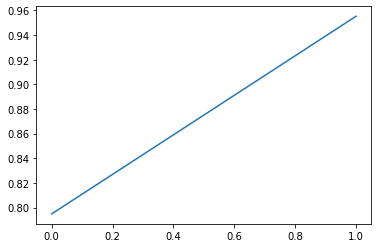

In [89]:
print(results.history["accuracy"])
plt.plot(results.history["accuracy"])